## Tiền xử lý dữ liệu

In [34]:
import pandas as pd

# Đọc dữ liệu từ excel file
bangdiem_cntt = pd.read_excel('Thay-Thong-Diem-Tong-Hop-K55_fix_3.xls', sheet_name = "Thong_TongHop", header = 3)
# , dtype={'DA':'|S', 'Class-XLTN':'|S'}'


# Clear data frame
rows = bangdiem_cntt.index[[0,1,2]]
bangdiem_cntt.rename( columns={'Unnamed: 3':'new column name'}, inplace=True )
bangdiem_cntt = bangdiem_cntt.drop(rows, axis = 0)
bangdiem_cntt = bangdiem_cntt.drop(['new column name', 'Mã SV', 'Họ và tên', 'STT'], axis = 1)
# bangdiem_cntt.apply(str)

# Đọc 5 dữ liệu đầu tiên của bảng dữ liệu - hiển thị cho ngắn gọn
bangdiem_cntt.head(5)

,Những nguyên lý cơ bản của chủ nghĩa MLN F1,Tin học đại cương,Giải tích 1,Những nguyên lý cơ bản của chủ nghĩa MLN F2,Nhập môn hệ quản trị cơ sở dữ liêu,Vật lý điện từ,Giải tích 2,Lập trình nâng cao,Giải tích số,Bảo trì hệ thống,...,Xử lý ảnh,Quản trị mạng,Đặc tả phần mềm,Công nghệ Oracle,Chuyên đề công nghệ thông tin,Chuyên đề,Trí tuệ nhân tạo,Thực tập tốt nghiệp,Đồ án tốt nghiệp,Xếp loại TN
3,D,B,A,D,B,D,D,B,C,B,...,C,D,B,B,B,B,C,B,B,C
4,D,A,D,C,C,B,C,A,A,B,...,B,C,B,A,D,D,B,B,B,C
5,D,C,D,D,C,D,D,C,C,A,...,B,A,A,C,A,A,B,A,A,C
6,B,C,D,D,A,C,C,B,A,C,...,A,B,B,B,B,D,A,B,C,C
7,C,B,A,C,C,D,B,C,C,B,...,C,C,B,C,A,C,C,B,C,C


In [35]:
# bangdiem_cntt.astype('|S')
# bangdiem_cntt['Tin học đại cương'].head()

In [36]:
# Convert dữ liệu sang nhãn số bảng A,B,C,D -> 0,1,2,3

bangdiem_cntt.replace('A', 0, inplace = True)
bangdiem_cntt.replace('B', 1, inplace = True)
bangdiem_cntt.replace('C', 2, inplace = True)
bangdiem_cntt.replace('D', 3, inplace = True)
bangdiem_cntt

,Những nguyên lý cơ bản của chủ nghĩa MLN F1,Tin học đại cương,Giải tích 1,Những nguyên lý cơ bản của chủ nghĩa MLN F2,Nhập môn hệ quản trị cơ sở dữ liêu,Vật lý điện từ,Giải tích 2,Lập trình nâng cao,Giải tích số,Bảo trì hệ thống,...,Xử lý ảnh,Quản trị mạng,Đặc tả phần mềm,Công nghệ Oracle,Chuyên đề công nghệ thông tin,Chuyên đề,Trí tuệ nhân tạo,Thực tập tốt nghiệp,Đồ án tốt nghiệp,Xếp loại TN
3,3,1,0,3,1,3,3,1,2,1,...,2,3,1,1,1,1,2,1,1,2
4,3,0,3,2,2,1,2,0,0,1,...,1,2,1,0,3,3,1,1,1,2
5,3,2,3,3,2,3,3,2,2,0,...,1,0,0,2,0,0,1,0,0,2
6,1,2,3,3,0,2,2,1,0,2,...,0,1,1,1,1,3,0,1,2,2
7,2,1,0,2,2,3,1,2,2,1,...,2,2,1,2,0,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,3,3,3,2,2,2,2,3,0,2,...,1,3,0,1,1,3,1,0,2,2
314,3,0,1,3,1,3,0,2,3,0,...,2,2,2,2,0,0,2,0,3,1
315,2,0,3,1,0,3,2,2,3,1,...,1,2,1,1,1,0,1,0,2,2
316,2,1,3,3,1,1,3,1,3,0,...,1,1,2,1,1,2,1,0,1,2


## Huấn luyện mô hình

In [48]:
target = bangdiem_cntt['Xếp loại TN']

In [49]:
new_df = bangdiem_cntt.drop('Xếp loại TN', axis = 1) # dữ liệu huấn tách trường nhãn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df, target, test_size =0.33)

In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [51]:
# df

In [52]:
model.score(X_test, y_test)

0.9807692307692307

In [66]:
a = list(range(49)) #-> A là 50 trường điểm
# a có thể thay thế bằng list 49 phần tử tự nhập ([1,2,3,0, .....])

## Dự đoán kết quả và hiển thị cây quyết định

In [65]:
model.predict([a]) # Kết quả dự đoán là sinh viên xếp loại B tương đương số 2

array([2], dtype=int64)

In [55]:
from matplotlib import pyplot as plt

In [56]:
import numpy as np
feature_name = bangdiem_cntt.columns.values.tolist()
target_name = np.array(['A', 'B', 'C'])
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=feature_name,  
                   class_names=target_name,
                   filled=True)

In [57]:
fig.savefig("full_feature_decision_tree.png")

In [67]:
# Cây quyết định biểu thị mô hình dữ liệu

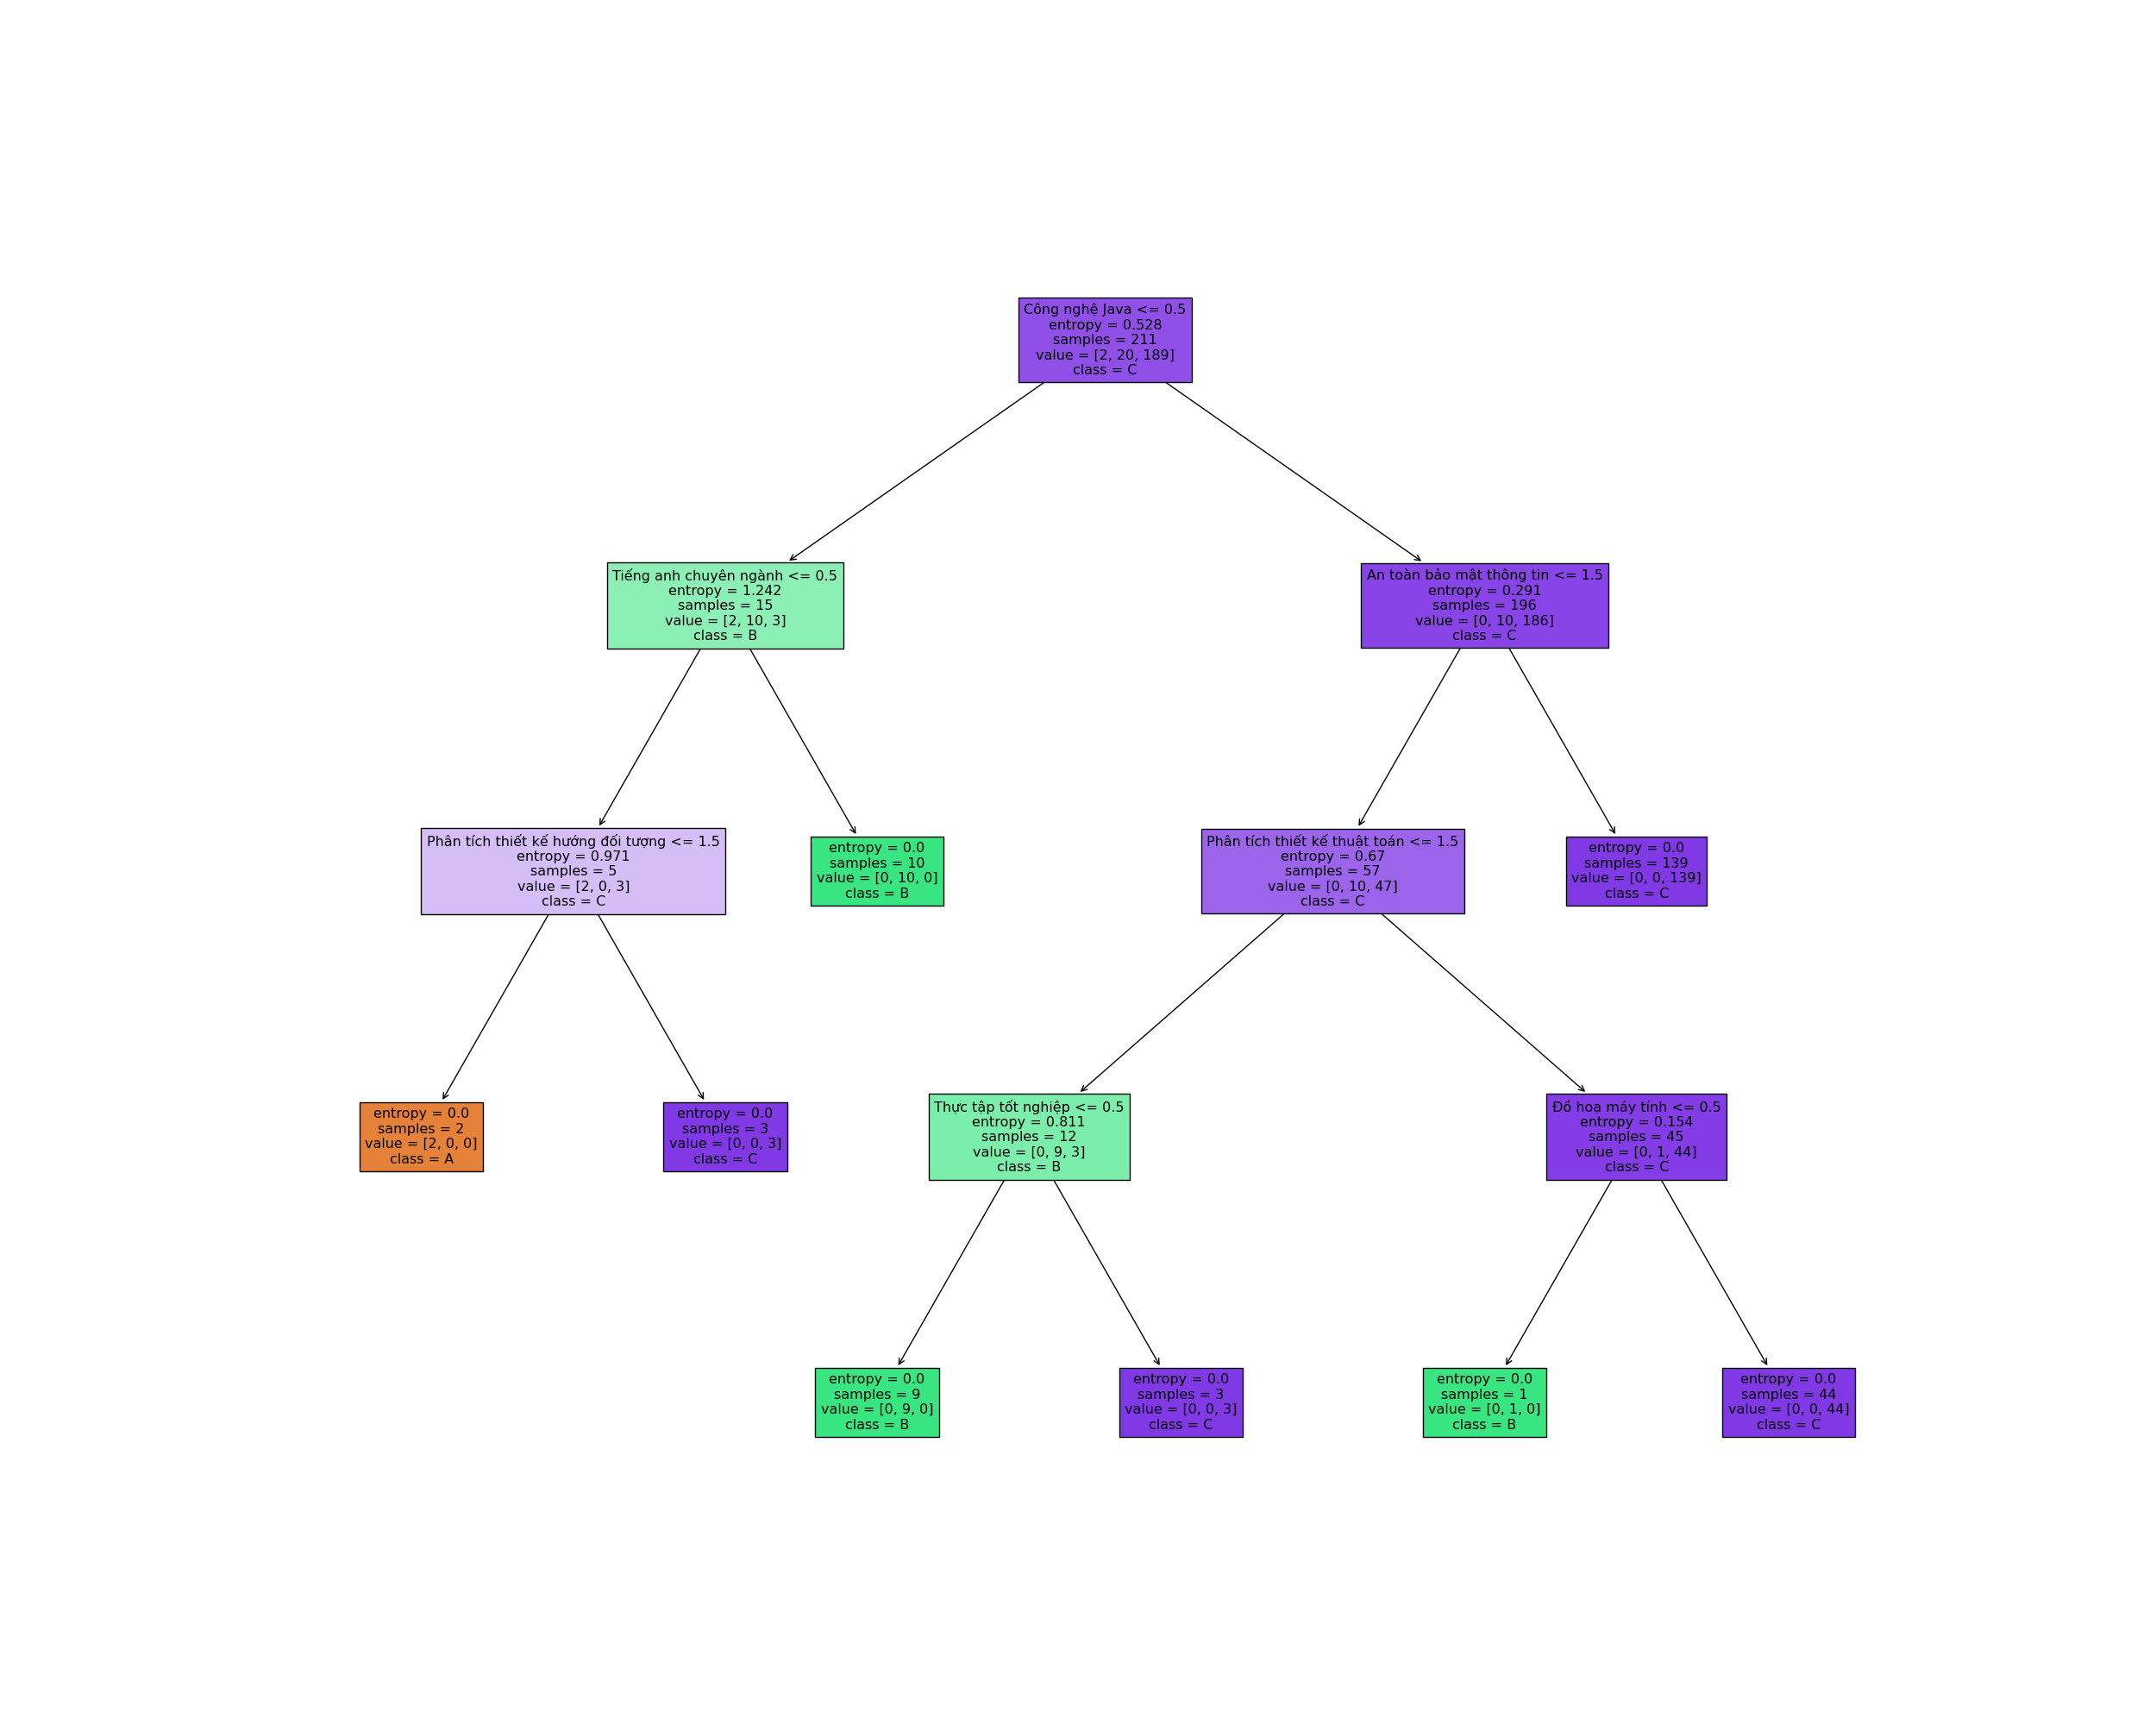

In [58]:
from IPython import display
display.Image("./full_feature_decision_tree.png")

## Hệ luật của cây quyết định

In [68]:


text_representation = tree.export_text(model)
print(text_representation)

|--- feature_16 <= 0.50
|   |--- feature_36 <= 0.50
|   |   |--- feature_39 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_39 >  1.50
|   |   |   |--- class: 2
|   |--- feature_36 >  0.50
|   |   |--- class: 1
|--- feature_16 >  0.50
|   |--- feature_25 <= 1.50
|   |   |--- feature_23 <= 1.50
|   |   |   |--- feature_47 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_47 >  0.50
|   |   |   |   |--- class: 2
|   |   |--- feature_23 >  1.50
|   |   |   |--- feature_29 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_29 >  0.50
|   |   |   |   |--- class: 2
|   |--- feature_25 >  1.50
|   |   |--- class: 2

